# 아파트 인허가 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
const_consent_df = pd.read_csv('../data/added_features/주택유형별(아파트)_인허가.csv')

In [3]:
const_consent_df

,Year,아파트 인허가
0,2007,50028
1,2008,21938
2,2009,26626
3,2010,51370
4,2011,47107
5,2012,43002
6,2013,45104
7,2014,29009
8,2015,41351
9,2016,25226


# 시각화

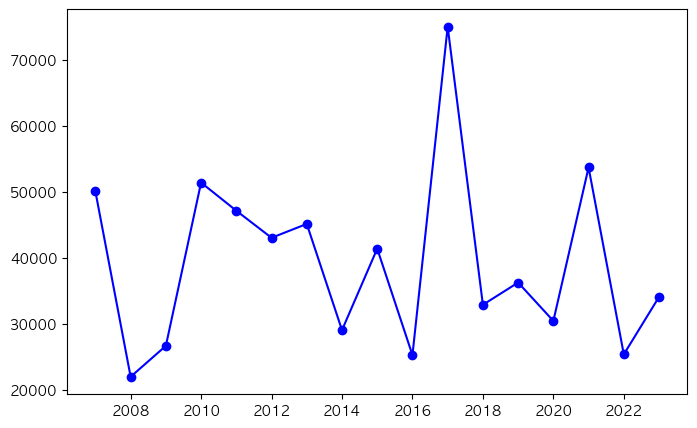

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(const_consent_df['Year'], const_consent_df['아파트 인허가'], marker='o', linestyle='-', color='b')
plt.show()

# 원본에 적용

In [5]:
df = pd.read_csv('../data/preprocessed/7_land_value.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_37029/2150798076.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/7_land_value.csv')


In [6]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션,지가지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,일반차로,127.107073,37.619326,7.0,2023,8,1712792.9,3.5,3.3,99.133
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,일반차로,127.107073,37.619326,7.0,2023,9,1712792.9,3.5,3.3,99.324


In [7]:
const_consent_mapping = pd.Series({year:value for year, value in zip(const_consent_df['Year'], const_consent_df['아파트 인허가'])})

df['아파트 인허가'] = np.nan
df['아파트 인허가'] = df['아파트 인허가'].fillna(df['계약년'].map(const_consent_mapping))

In [8]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,127.107073,37.619326,7.0,2023,8,1712792.9,3.5,3.3,99.133,34043.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,127.107073,37.619326,7.0,2023,9,1712792.9,3.5,3.3,99.324,34043.0


In [9]:
df.to_csv('../data/preprocessed/8_construction_consent.csv', index=False)